In [153]:

import glob
import PySimpleGUI as sg
import numpy as np
from PIL import Image, ImageTk,ImageOps
import cv2
import array as arr
import os
from os import listdir
from math import *
import math
import random
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

Reading the image from folder

In [154]:

def parse_folder(path):
  for images in glob.iglob(f'{path}/*'):
    if (images.endswith(".png") or images.endswith(".jpg") or images.endswith(".jpeg")):
        
        return images
def load_image(path, window):
    try:
        image = Image.open(path)
        image.thumbnail((150, 150))
        photo_img = ImageTk.PhotoImage(image)
        window["im1"].update(data=photo_img)
    except:
            print(f"Unable to open {path}!")

In [155]:
z = 5 //2
#print(z)

In [156]:
def pad(img):

   img = Image.fromarray(img)
   img =ImageOps.grayscale(img)
   w,h = img.size
   kernel = np.zeros((w+2,h+2),dtype=np.uint8)
   for i in range(0,w):
        for j in range(0,h):
            kernel[i+1][j+1] = img.getpixel((i,j))

   g = Image.fromarray(kernel)
   # g.show()
   # img.show()
   return g
# pad('D:/CS/SEM7/IMAGE/CODE/test/B2DBy.jpg')
# cv2.waitKey(0)

In [157]:
def medianfilter(img,size,window):
    m_img = img
    mapp=m_img.load()
    w,h = img.size
    k = np.zeros((w-2,h-2),dtype=np.uint8)
    m_w = size
    m_h=size
    i2=j2=0
    for i in range(1,w-2):
        for j in range(1,h-2):
            mask = np.zeros((m_w,m_h))
            xx=i-m_w//2
            yy=j-m_h//2
            for x in range(m_w):
                for y in range(m_h):
                    if xx>0 and xx<w and yy>0 and yy<h:
                        mask[x][y] = img.getpixel((xx,yy))
                    else:
                        mask[x][y]=0
                    yy+=1
                xx+=1
                yy=j-1
            m = np.median(mask)
            k[i2,j2]= m
            j2+=1
        i2+=1
        j2=0
    g = Image.fromarray(k)
    # g.show()
    # img.show()
    g.thumbnail((150, 150))
    photo_img = ImageTk.PhotoImage(g)
    window["im2"].update(data=photo_img)
    return k
# t = pad('D:/CS/SEM7/IMAGE/CODE/test/B2DBy.jpg')
# medianfilter(t)

In [158]:
def convolve2d_avg(img, kernel,c,kern_size):
    image=img
    sum=0
    # convolution output
    output = np.zeros_like(image)
    # kernel = list(reversed(list(zip(kernel))))
    # Add zero padding to the input image
    image_padded = np.zeros((image.shape[0] + 2, image.shape[1] +2))
    #print(image.shape)
    image_padded[1:-1, 1:-1] = image
    # Loop over every pixel of the image
    for x in range(image.shape[1]-1):
        for y in range(image.shape[0]-1):
          # #print(c((kernel * image_padded[ x:x+kern_size,y: y+kern_size]).sum()))
          output[y, x]= (image_padded[ y: y + kern_size , x: x + kern_size  ]).sum()/9


    return output

In [159]:
def avregingfilter(img,window):
    m_img = cv2.imread(img)
    # print(m_img.shape[0])
    # mapp=m_img.load()
    # w,h = img.size
    # k = np.zeros((w-2,h-2),dtype=np.uint8)
    # m_w = 3
    # m_h=3
    # kernel = np.ones((3,3))
    # kernel = kernel /9
    # i2=j2=0
    # for i in range(1,w-2):
    #     for j in range(1,h-2):
    #         mask = np.zeros((3,3))
    #         xx=i-1
    #         yy=j-1
    #         for x in range(m_w):
    #             for y in range(m_h):
    #                 mask[x][y] = img.getpixel((xx,yy))
    #                 yy+=1
    #             xx+=1
    #             yy=j-1
    #         tot=0
    #         for x in range(m_w):
    #             for y in range(m_h):
    #                 tot+= mask[x][y] * kernel[x][y]

    #         k[i2,j2]= tot
    #         j2+=1
    #     i2+=1
    #     j2=0
    k = convolve2d_avg(m_img, 1,1,3)
    g = Image.fromarray(k)
    # g.show()
    # img.show()
    g.thumbnail((150, 150))
    photo_img = ImageTk.PhotoImage(g)
    window["im2"].update(data=photo_img)
    return k
# t = pad('D:/CS/SEM7/IMAGE/CODE/test/a.png')
# avregingfilter(t)

Gaussian 3*3 Matrix
1/16 * [1,2,1] [2,4,2] [1,2,1]

In [160]:
def gausian(img,window):
    m_img = img
    mapp=m_img.load()
    w,h = img.size
    k = np.zeros((w-2,h-2),dtype=np.uint8)
    m_w = 3
    m_h=3
    kernel = np.ones((3,3))
    kernel[0,0]= 1/16
    kernel [0,1] = 2/16
    kernel[0,2]= 1/16
    kernel[1,0]=2/16
    kernel[1,1] = 4/16
    kernel[1,2]=2/16
    kernel[2,0]=kernel[2,2]=1/16
    kernel[2,1] = 2/16
    i2=j2=0
    for i in range(1,w-2):
        for j in range(1,h-2):
            mask = np.zeros((3,3))
            xx=i-1
            yy=j-1
            for x in range(m_w):
                for y in range(m_h):
                    mask[x][y] = img.getpixel((xx,yy))
                    yy+=1
                xx+=1
                yy=j-1
            # tot=0

            # for x in range(m_w):
            #     for y in range(m_h):
            #         tot+= mask[x][y] * kernel[x][y]
            k[i2,j2] = np.sum(kernel * mask)
            j2+=1
        j2=0
        i2+=1
            # k[i,j]=np.sum(mask*kernel)
    g = Image.fromarray(k)
    # g.show()
    # img.show()
    g.thumbnail((150, 150))
    photo_img = ImageTk.PhotoImage(g)
    window["im2"].update(data=photo_img)
    return k

In [161]:
# t=pad('D:/CS/SEM7/IMAGE/CODE/test/a.png')
# gausian(t)
# img = cv2.imread('D:/CS/SEM7/IMAGE/CODE/test/a.png',0)
# ii=cv2.GaussianBlur(img,(3,3),0)
# cv2.imshow('ss',ii)
# cv2.waitKey(0)


In [162]:
def sinu(path):
    img = cv2.imread(path,0)
    arr = np.array(img)
    arr.flatten()
    # arr= np.arange(arr)
    time = np.arange(0, 10, 0.1)
    amplitude = np.sin(arr)
    plt.plot(arr, amplitude)
    plt.title('Sine wave')
    plt.xlabel('Time')
    plt.ylabel('Amplitude = sin(time)')
    plt.grid(True, which='both')
    plt.axhline(y=0, color='k')
    plt.show()
    plt.show()
# sinu('C:/Users/user/Desktop/b.png')
# cv2.waitKey(0)

In [163]:
# x(k) = E(n=0,w) img(n) * e^-2jpink/n
# x(k) = 
def fourir(path):
    img = cv2.imread(path,0)
    w,h = img.shape
    forir= np.zeros_like(img,dtype=complex)
    for i in range(w):
        for j in range(h):
            fx=0
            fy=0
            for x in range(w):
              if img[i][j]==img[x][j]:
                fx+=1
            for x in range(h):
              if img[i][j]==img[i][x]:
                fy+=1
                # tot+=ff
            fx /=w
            fy/=h
            ff= img[i][j] *(np.e**(complex(0,-2)*np.pi*((i*fx)/w)+((j*fy)/h))) 
            forir[i][j]=ff
    
    x = forir.real
    y = forir.imag
    # fshift = np.fft.fftshift(forir)
    # magnitude_spectrum = 20*np.log(np.abs(fshift))
    plt.subplot(122),plt.imshow(forir, cmap = 'gray')
    plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
    plt.show()
    # plt.plot(x, y, 'g*')
    # plt.subplot(122),plt.imshow(, cmap = 'gray')
    # plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
    # plt.show()
# fourir('C:/Users/user/Desktop/b.png')
# cv2.waitKey(0)

In [164]:
def dnorm(x, mu, sd):
    return 1 / (np.sqrt(2 * np.pi) * sd) * np.e ** (-np.power((x - mu) / sd, 2) / 2)
def gaussian2(size,img):
    w,h = img.size
    m_w=m_h=3
    std=math.sqrt(m_w*m_h)
    k = np.zeros((w-2,h-2),dtype=np.uint8)
    kernel_1D = np.linspace(-(size // 2), size // 2, size)
    for i in range(size):
        kernel_1D[i] = dnorm(kernel_1D[i], 0, std)
        kernel_2D = np.outer(kernel_1D.T, kernel_1D.T)
    kernel_2D *= 1.0 / kernel_2D.max()
    #print(kernel_2D)
    for i in range(1,w-2):
        for j in range(1,h-2):
            mask = np.zeros((3,3))
            xx=i-1
            yy=j-1
            for x in range(m_w):
                for y in range(m_h):
                    mask[x][y] = img.getpixel((xx,yy))
                    yy+=1
                xx+=1
                yy=j-1
            k[i,j] = np.sum(kernel_2D * mask)
            # k[i,j] /= 9
    g = Image.fromarray(k)
    g.show()
    img.show()
# t = pad('D:/CS/SEM7/IMAGE/CODE/test/a.png')
# # std = np.std(t)
# gaussian2(3,t)

In [165]:
def adaptivemdeianfilter(img,window):
    # p = img.getpixel((2,2))
    # #print(p)
    w,h = img.size
    m_w=m_h=3
    k = np.zeros((w-2,h-2),dtype=np.uint8)
    for i in range(1,w-2):
        for j in range(1,h-2):
            m_w=m_h=3
            flag=0
            mask = np.zeros((m_w,m_h))
            xx=i-m_w//2
            yy=j-m_h//2
            while (m_w <=7):
                mask = np.zeros((m_w,m_h))
                for x in range(m_w):
                    for y in range(m_h):
                        if xx>0 and xx<w and yy>0 and yy<h:
                            p = img.getpixel((xx,yy))
                        else:
                            p=0
                        mask[x][y] = p
                        yy+=1
                    xx+=1
                    yy=j - m_h//2
                zmin = np.amin(mask)
                zmax = np.max(mask)
                zmed = np.median(mask)
                pixel = int(img.getpixel((i,j)))
                a1 = zmed - zmin
                a2 = zmed - zmax
                if a1>0 and a2<0:
                    b1= pixel -zmin
                    b2 = pixel -zmax
                  #  #print('in')
                    if b1>0 and b2<0 :

                        k[i][j] = pixel
                        flag+=1
                        break
                    else:
                        k[i][j] = zmed
                        flag+=1
                        break
                else:
                    m_w+=2
                    m_h+=2
            if flag==0:
                k[i][j] = zmed
               # #print('not in')
    g = Image.fromarray(k)
#     g.show()
    g.thumbnail((150, 150))
    photo_img = ImageTk.PhotoImage(g)
    window["im2"].update(data=photo_img)
    return k
# t = pad('D:/CS/SEM7/IMAGE/CODE/test/a.png')
# adaptivemdeianfilter(t)

Adding salt and pepper noise


In [166]:

def saltandpepper(path,window): 
    img= path
    r , c = img.shape
    number_of_pixels = random.randint(50, 250)
    for i in range(number_of_pixels):
        y=random.randint(0, r - 1)
        x=random.randint(0, c - 1)
        img[y][x] = 255
        number_of_pixels = random.randint(50 , 250)
        for i in range(number_of_pixels):
            y=random.randint(0, r - 1)
            x=random.randint(0, c - 1)
            img[y][x] = 0
    k = Image.fromarray(img)
    k.thumbnail((150, 150))
    photo_img = ImageTk.PhotoImage(k)
    window["im2"].update(data=photo_img)
    k = np.array(img)
    return img
# # t = pad('D:/CS/SEM7/IMAGE/CODE/test/B2DBy.jpg')
# saltandpepper('D:/CS/SEM7/IMAGE/CODE/test/B2DBy.jpg')

Geometric mean filter to remove gaussia noise


In [167]:
def g_mean(x):
    x2 = x.flatten()
    # x_new = [i for i in x2 if i != 0]
    a = np.prod(x2)
    return np.power(a,1/9)
# arr= np.array([5,16,22,6,3,16,12,3,15])
# #print(g_mean(arr))

In [168]:
def geomean(img,window):
    m_img = img
    
    w,h = img.size
    k = np.zeros((w-2,h-2),dtype=np.uint8)
    m_w = 3
    m_h=3
    i2=0
    for i in range(1,w-2):
        j2=0
        for j in range(1,h-2):
            mask = np.zeros((3,3))
            xx=i-1
            yy=j-1
            for x in range(m_w):
                for y in range(m_h):
                    mask[x][y] = img.getpixel((xx,yy))
                    if mask[x][y] ==0:
                        mask[x][y] = 1
                
                    yy+=1
                xx+=1
                yy=j-1
            m = g_mean(mask)
            # m = np.prod(mask)
            # m = np.power(m,1/9)
            # m = np.sum(mask)
            # m/= (m_w*m_h)
            k[i2,j2]= m
            j2+=1
        i2+=1
    g = Image.fromarray(k)
    # g.show(title="modimg")
    # # img.show()
    g.thumbnail((150, 150))
    photo_img = ImageTk.PhotoImage(g)
    window["im2"].update(data=photo_img)
    return k
# t = pad('D:/Downloads/Noisy-image-Gaussian-noise-with-mean-and-variance-0005.png')
# t.show()
# geomean(t)

Removing impulse noise using median filter

In [169]:
def median_filter(data, filter_size):
    temp = []
    indexer = filter_size // 2
    data_final = []
    data_final = np.zeros((len(data),len(data[0])))
    for i in range(len(data)):

        for j in range(len(data[0])):

            for z in range(filter_size):
                if i + z - indexer < 0 or i + z - indexer > len(data) - 1:
                    for c in range(filter_size):
                        temp.append(0)
                else:
                    if j + z - indexer < 0 or j + indexer > len(data[0]) - 1:
                        temp.append(0)
                    else:
                        for k in range(filter_size):
                            temp.append(data[i + z - indexer][j + k - indexer])

            temp.sort()
            data_final[i][j] = temp[len(temp) // 2]
            temp = []
    return data_final

# plt.imshow(img)
# plt.show() 
def removesalt(path,size,window):
    img = Image.fromarray(path)
    # img = Image.open(path).convert("L")
    arr = np.array(img)
    removed_noise = median_filter(arr, size) 
    img = Image.fromarray(removed_noise)
# img.show()
    img.thumbnail((150, 150))
    photo_img = ImageTk.PhotoImage(img)
    window["im2"].update(data=photo_img)
    return removed_noise
# plt.imshow(img)
# plt.show()

In [170]:
def retgau(img):
    # img  = Image.fromarray(img)
    m_img = img
    # mapp=m_img.load()
    w,h = img.shape
    #print(w)
    #print(h)
    k = np.zeros((w,h),dtype=np.uint8)
    m_w = 3
    m_h=3
    kernel = np.ones((3,3))
    kernel[0,0]= 1/16
    kernel [0,1] = 2/16
    kernel[0,2]= 1/16
    kernel[1,0]=2/16
    kernel[1,1] = 4/16
    kernel[1,2]=2/16
    kernel[2,0]=kernel[2,2]=1/16
    kernel[2,1] = 2/16
    for i in range(w):
        for j in range(h):
            mask = np.zeros((3,3))
            xx=i-1
            yy=j-1
            for x in range(m_w):
                for y in range(m_h):
                    if xx>0 and xx<w and yy>0 and yy<h:
                        mask[x][y] = img[xx,yy]
                    else:
                        mask[x][y] = 0
                    yy+=1
                xx+=1
                yy=j-1
            k[i,j] = np.sum(kernel * mask)
    # g = Image.fromarray(k)
    # #print(g.size)
    return k

sharpeningfilters


In [171]:
def unsharphighboost(k,path,window):
    # k=2
    img = path
    # img = cv2.imread(path,0)
    # cv2.imshow("normal",img)
    # cv2.imshow("ss",img)
    w,h = img.shape
    k22 = np.zeros_like(img)
    # kernel = np.ones((3,3))
    # kernel = kernel /9
    kernel = np.ones((3,3))
    kernel[0,0]= 1/16
    kernel [0,1] = 2/16
    kernel[0,2]= 1/16
    kernel[1,0]=2/16
    kernel[1,1] = 4/16
    kernel[1,2]=2/16
    kernel[2,0]=kernel[2,2]=1/16
    kernel[2,1] = 2/16
    m_w=m_h=3
    for i in range(w):
        for j in range(h):
            mask = np.zeros((3,3))
            xx=i-1
            yy=j-1
            for x in range(m_w):
                for y in range(m_h):
                    if xx>0 and xx<w and yy>0 and yy<h:
                        mask[x][y] = img[xx,yy]
                    else:
                        mask[x][y]=0
                    yy+=1
                xx+=1
                yy=j-1
            tot=0
            for x in range(m_w):
                for y in range(m_h):
                    tot+= mask[x][y] * kernel[x][y]

            k22[i,j]= tot
    
    # cv2.imshow("c",k22)
    mask = img - k22
    highboost = img + k*mask
    # w= "f"
    # cv2.namedWindow(w)  
    # cv2.moveWindow(w, 500,30)  
    # cv2.imshow(w,highboost)
    rr=Image.fromarray(highboost)
    # rr.show()
    rr.thumbnail((150, 150))
    photo_img = ImageTk.PhotoImage(rr)
    window["im2"].update(data=photo_img)
    return highboost
# unsharphighboost(4,'D:/Downloads/mona.jpg')
# cv2.waitKey(0)

In [172]:
def convolve2d(image, kernel,c,kern_size):
 
    sum=0
    # convolution output
    output = np.zeros_like(image)
    # kernel = list(reversed(list(zip(kernel))))
    # Add zero padding to the input image
    image_padded = np.zeros((image.shape[0] +kern_size//2+1 , image.shape[1] +kern_size//2+1))
    #print(image.shape)
    image_padded[1:-kern_size//2, 1:-kern_size//2] = image
    # Loop over every pixel of the image
    for x in range(image.shape[1]-1):
        for y in range(image.shape[0]-1):
          # #print(c((kernel * image_padded[ x:x+kern_size,y: y+kern_size]).sum()))
          output[y, x]= (kernel * image_padded[ y: y + kern_size , x: x + kern_size  ]).sum()


    return output

In [173]:
# laplacian filter
def laplacian(path,c2,x,window):
    # img = cv2.imread(path)
    img = path
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    laplacian=np.array([[0,1,0],
            [1,-4,1],
            [0,1,0]])


    another_laplacian=np.array([[-1,-1,-1],
            [-1,8,-1],
            [-1,-1,-1]])

    Laplacian_img = convolve2d(img, kernel=laplacian,c=c2,kern_size=x)
#     cv2.imshow("xxx",Laplacian_img)
    sharpened= img+(c2*Laplacian_img)
#     cv2.imshow("ss",sharpened)
    rr=Image.fromarray(sharpened)
    # rr.show()
    rr.thumbnail((150, 150))
    photo_img = ImageTk.PhotoImage(rr)
    window["im2"].update(data=photo_img)
    return sharpened

In [174]:
# Sobel filter
def sobel(path,window):
    img =path    
#     img = cv2.imread(path,0)
    kernel_1=np.array([[-1,0,1],
            [-2,0,2],
            [-1 ,0,1]])

    kernel_5=np.array([[2,2,4,2,2],
            [1,1,2,1,1],
            [0,0,0,0,0],
            [-1,-1,-1,-1,-1],
            [-2,-2,-4,-2,-2]])


    kernel_2= np.array([[-1,-2,-1],
            [0,0,0],
            [1,2,1]])


    Sobel_img = convolve2d(img, kernel=kernel_5,c=1,kern_size=5)
    # cv2_imshow(Sobel_img)
    sharpened= img-Sobel_img
    rr=Image.fromarray(sharpened)
    rr.thumbnail((150, 150))
    photo_img = ImageTk.PhotoImage(rr)
    window["im2"].update(data=photo_img)
    return sharpened
    # cv2_imshow(sharpened)

In [175]:
# Robert cross gradient
def robert(path,window):
  img1 = path
  # img1 = cv2.imread(path,0)
  Mx =np.array([[1,0],
            [0,-1]])
  My = np.array([[0,1],
            [-1,0]])
  Robert_img = convolve2d(img1, kernel=Mx,c=1,kern_size= 2)
  Robert_img1 = convolve2d(img1, kernel=My,c=1,kern_size= 2)
  output= np.zeros_like(Robert_img)
  threeshold=50
  for x in range(Robert_img.shape[0]): 
        for y in range(Robert_img.shape[1]):
          output[x][y]= sqrt((Robert_img[x][y]**2)+(Robert_img1[x][y]**2))
          if output[x][y]>threeshold:
            output[x][y]=0
  sharpened= img1+output
  rr=Image.fromarray(sharpened)
  rr.thumbnail((150, 150))
  photo_img = ImageTk.PhotoImage(rr)
  window["im2"].update(data=photo_img)
  return sharpened


In [176]:
# # determining the length of original image
# m = cv2.imread('D:/CS/SEM7/IMAGE/CODE/test/dog/a5.png')
# width = int(m.shape[1] * 200 / 100)
# height = int(m.shape[1] * 200 / 100)
# dimensions = (width, height)
# resized = cv2.resize(m, dimensions, cv2.INTER_AREA)
# cv2.imshow('ss',resized)
# cv2.waitKey(0)

In [177]:
def intneighbor(path,window):
    # arr = np.array([[2,3,2],[5,6,5],[3,4,7]])
    # img = cv2.imread(path)
    img = path
    w,h= img.shape
    arr2 = np.ones([w*2,h*2,3],dtype=np.uint8)
    wn=hn=0
    
    for i in range(w):
        for j in range(h):
            p = img[i][j] 
            arr2[wn][hn] = p
            arr2[wn+1][hn] = p
            arr2[wn][hn+1] = p
            arr2[wn+1][hn+1] = p
            hn+=2
        hn=0
        wn+=2
    # cv2.imshow("n",img)
    # cv2.imshow("s",arr2)
    # #print(arr2)
    color_coverted = cv2.cvtColor(arr2, cv2.COLOR_BGR2RGB)
    im = Image.fromarray(color_coverted)
    im.thumbnail((200, 200))
    photo_img = ImageTk.PhotoImage(im)
    window["im2"].update(data=photo_img)
    return color_coverted
# intneighbor('D:/CS/SEM7/IMAGE/CODE/test/dog/a5.png')
# cv2.waitKey(0)

In [178]:
def interb(path,window):
    # image=cv2.imread(path)
    image =path
    h = image.shape[0]
    w = image.shape[1]
    d = image.shape
    d2 = (d[0]*2,d[1]*2)
    scale_x = (w)/(w*2)
    scale_y = (h)/(h*2)

    new_image = np.zeros((d2[0], d2[1]),dtype=np.uint8)

    
    for i in range(d2[0]):
        for j in range(d2[1]):
            x = (j+0.5) * (scale_x) - 0.5
            y = (i+0.5) * (scale_y) - 0.5
            # #print(x)
            x_int = int(x)
            y_int = int(y)

            # Prevent crossing
            x_int = min(x_int, w-2)
            y_int = min(y_int, h-2)

            x_diff = x - x_int
            y_diff = y - y_int

            a = image[y_int, x_int]
            b = image[y_int, x_int+1]
            c = image[y_int+1, x_int]
            d = image[y_int+1, x_int+1]

            pixel = a*(1-x_diff)*(1-y_diff) + b*(x_diff) * \
                (1-y_diff) + c*(1-x_diff) * (y_diff) + d*x_diff*y_diff

            new_image[i, j] = pixel.astype(np.uint8)
    color_coverted = cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB)
    im = Image.fromarray(color_coverted)
    im.thumbnail((200, 200))
    photo_img = ImageTk.PhotoImage(im)
    window["im2"].update(data=photo_img)
    return color_coverted
# img = cv2.imread('D:/CS/SEM7/IMAGE/CODE/test/dog/B2DBy.jpg')
# d = img.shape
# d2 = (d[0]*2,d[1]*2)
# i2 = interb(img)
# cv2.imshow("dd",i2)
# cv2.waitKey(0)

In [179]:
# def interb(path):
#     img = cv2.imread(path)
#     w,h,_=img.shape
#     w2 = w*2
#     h2 = h*2
#     img2 = np.zeros((w2,h2,3),dtype=np.uint8)
#     for i in range(w):
#         for j in range(h):
            
#     return img2
# img = cv2.imread('D:/CS/SEM7/IMAGE/CODE/test/dog/B2DBy.jpg')
# x=interb('D:/CS/SEM7/IMAGE/CODE/test/dog/B2DBy.jpg')
# cv2.imshow(img)
# cv2.waitKey()

Histogram equalization


In [180]:
def addgaussiannoise(path,window):
    # img = cv2.imread(path,0)
    img = path
    img = img/255
    w,h = img.shape
    mean=0
    var=0.01
    std = np.sqrt(var)
    n=np.random.normal(loc=mean,scale=std,size=(w,h))
    # #print(n)
    img2 = img  + n
    # cv2.imshow("cc",img2)
    img2 *=255
    im  = Image.fromarray(img2)
    # im.show()
    im.thumbnail((150, 150))
    photo_img = ImageTk.PhotoImage(im)
    window["im2"].update(data=photo_img)
    return img2
# addgaussiannoise('D:/CS/SEM7/IMAGE/CODE/test/dog/B2DBy.jpg')
# cv2.waitKey(0)

In [181]:
def adduniformnoise(path,window):
    # img = cv2.imread(path,0)
    img = path
    img = img/255
    w,h = img.shape
    noise = np.zeros_like(img,dtype=np.float64)
    for i in range(w):
        for j in range(h):
            noise[i][j]=np.random.uniform(0,0.4)
    # #print(noise)
    img3 = img  + noise
    img3*=255
    img2  = Image.fromarray(img3)
    img2.thumbnail((150, 150))
    photo_img = ImageTk.PhotoImage(img2)
    window["im17"].update(data=photo_img)
    return img3
    # cv2.imshow("ss",img3)
    # cv2.imshow("sss",noise)
# adduniformnoise('D:/CS/SEM7/IMAGE/CODE/test/dog/B2DBy.jpg')
# cv2.waitKey(0)

In [182]:
def honly(img):
    mapp=img.load()
    h=np.zeros(shape=(256,1))
    width,hight=img.size
    for i in range(width):
        for j in range(hight):
            k=mapp[i,j]
            h[k,0]+=1 

    x= h.reshape(1,256)
    y=np.array([])
    y=np.append(y,x[0,0])

    for i in range(255):
        k=x[0,i+1]+y[i]
        y=np.append(y,k)
    y=np.round((y/(width*hight))*255)
    return y 
def histm(path,path2,window):
    # img = Image.open(path)
    # im3=img =ImageOps.grayscale(img)
    img = Image.fromarray(path)
    # im3=img
    img2 = Image.open(path2)
    img2 = ImageOps.grayscale(img2)
    mapp = img.load()
    width,hight=img.size
    y=honly(img)
    y2=honly(img2)
    # #print(y[0])
    # #print(y2[0])
    for i in range(255):
        y[i]=y2[int(y[i])]
    f=0
    for i in range (width):
        for j in range (hight):
            k=mapp[i,j]
            # #print(mapp[i,j])
            # #print(y[k])
            img.putpixel((i, j), int(y[k]))
            # mapp[i,j]= int(y[k])
    # img2.show()       
    # im3.show()         
    # img.show()
    img.thumbnail((150, 150))
    photo_img = ImageTk.PhotoImage(img)
    window["im2"].update(data=photo_img)
    # img2.thumbnail((150, 150))
    # photo_img = ImageTk.PhotoImage(img2)
    # window["im2"].update(data=photo_img)
    return img
# histm('D:/CS/SEM7/IMAGE/CODE/test/dog/a23.png','D:/CS/SEM7/IMAGE/CODE/test/dog/aa.png')
# 'D:/CS/SEM7/IMAGE/CODE/test/eq/PgaNb.png'
#'D:/CS/SEM7/IMAGE/CODE/test/dog/B2DBy.jpg'


In [183]:
def histeq(path,window):
    img = path
    # img = Image.open(path)
    # img =ImageOps.grayscale(img)
    # mapp=img.load()
    h=np.zeros(shape=(256,1))
    width,hight=img.shape
    a= np.zeros(256,dtype=int)
    for i in range(width):
        for j in range(hight):
            k=img[i,j]
            a[img[i,j]]+=1
            h[k,0]+=1 
    fig = plt.figure(num=None, figsize=(6, 4), dpi=100)
    fig.add_subplot(111).plot(a)
    # z= plt.plot(a)
    x= h.reshape(1,256)
    y=np.array([])
    y=np.append(y,x[0,0])

    for i in range(255):
        k=x[0,i+1]+y[i]
        y=np.append(y,k)
    y=np.round((y/(width*hight))*255)
    #print(y)
    # plt.hist(img, bins=110)
    # plt.show()
    for i in range (width):
        for j in range (hight):
            k=img[i,j]

            img[i,j]= int(y[k])
            a[img[i,j]]+=1
    k = Image.fromarray(img)
    k.thumbnail((150, 150))
    photo_img = ImageTk.PhotoImage(k)
    window["im2"].update(data=photo_img)
    hist1 = cv2.calcHist([img],[0],None,[256],[0,256])
    fig.savefig("s12.png", transparent=True)
    i66 = Image.open("s12.png")
    i66.thumbnail((150, 150))
    photo_img = ImageTk.PhotoImage(i66)
    window["im4"].update(data=photo_img)
    # plt.subplot(222),plt.plot(a)
    plt.subplot(222),plt.plot(hist1)
    plt.savefig("s1.png", transparent=True)
    i66 = Image.open("s1.png")
    i66.thumbnail((150, 150))
    photo_img = ImageTk.PhotoImage(i66)
    window["im3"].update(data=photo_img)
    
    # plt.hist(np.arra(img), bins=50)
    plt.show()
    return img


In [184]:
def histbefore(img):
    hist1 = cv2.calcHist([img],[0],None,[256],[0,256])
    # plt.subplot(222),plt.plot(hist1)
    plt.subplot(222),plt.plot(hist1)

In [185]:
def dft(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(2j * np.pi * k * n / N)
    return np.dot(M, x)

def fft(x):
  x = np.asarray(x, dtype=float)
  N = x.shape[0]
  # #print(x.shape[0], '=======', x.shape[1])
  if N % 2 > 0:
      raise ValueError("must be a power of 2")
  elif N <= 2:
      return dft(x)
  else:
      X_even = fft(x[::2])
      X_odd = fft(x[1::2])
      terms = np.exp(-2j * np.pi *np.arange(N) / N)
      return np.concatenate([X_even + terms[:int(N/2)] * X_odd,
                              X_even + terms[int(N/2):] * X_odd])
      

def inv_fft(x):
  x = np.asarray(x, dtype=int)
  N = x.shape[0]
  # #print(x.shape[0], '=======', x.shape[1])
  if N % 2 > 0:
      raise ValueError("must be a power of 2")
  elif N <= 2:
      return dft(x)
  else:
      X_even = fft(x[::2])
      X_odd = fft(x[1::2])
      terms = np.exp(-2j * np.pi *np.arange(N) / N)
      return (1/N)*(np.concatenate([X_even + terms[:int(N/2)] * X_odd,
                              X_even + terms[int(N/2):] * X_odd]))
      


In [191]:
def DFT(path,window):
  image=path
  image = cv2.resize(image,(256,256))
  image_padded = np.zeros((image.shape[0] , image.shape[1] ))
  image_padded = image.flatten()
  forir=fft(image_padded)
  # #print(forir[0])
  final_scratch = np.zeros((256,256),dtype=complex)
  ct=0
  for i in range(256):
    for ii in range (256):
      final_scratch[i][ii]= (-1**(image[i][ii]))*forir[ct]
      ct+=1
  # final_scratch = np.fft.fftshift(final_scratch)
  fig = plt.figure(num=None, figsize=(6, 4), dpi=100)
  fig.add_subplot(111).plot(abs(np.log(final_scratch)))
  plt.imshow(abs(np.log(final_scratch)), cmap='gray')
  plt.savefig("s1.png", transparent=True)
  i66 = Image.open("s1.png")
  i66.thumbnail((400, 400))
  photo_img = ImageTk.PhotoImage(i66)
  window["im2"].update(data=photo_img)
  f = np.array(forir)
  return f

In [187]:

def inversef(img,window):
  image=img
  image = cv2.resize(image,(256,256))
  image_padded = np.zeros((image.shape[0] , image.shape[1] ))
  #print(image.shape)
  image_padded = image.flatten()
  #print(image_padded.shape[0]) 
  forir=fft(image_padded)
  # readymade= np.fft.fft(image_padded)
  # #print(forir[0])
  final_scratch = np.zeros((256,256),dtype=complex)
  ct=0
  for i in range(256):
    for ii in range (256):
      final_scratch[i][ii]=forir[ct]
      ct+=1
  orig= np.zeros((256,256))
  inv=inv_fft(forir)
  ct=0
  for i in range(255):
    for ii in range (255):
      ct+=1
      orig[i][ii]=inv[ct].real

  i2 = Image.fromarray(orig)
  i2.thumbnail((150, 150))
  photo_img = ImageTk.PhotoImage(i2)
  window["im2"].update(data=photo_img)


In [188]:

# def inversef(img,window):
#   image=img
#   # image = cv2.resize(image,(256,256))
#   image_padded = np.zeros((image.shape[0] , image.shape[1] ))
#   # #print(image.shape)
#   image_padded = image.flatten()
#   # #print(image_padded.shape[0]) 
#   forir=fft(image_padded)
#   # readymade= np.fft.fft(image_padded)
#   # #print(forir[0])
#   final_scratch = np.zeros((256,256),dtype=complex)
#   ct=0
#   for i in range(256):
#     for ii in range (256):
#       final_scratch[i][ii]=forir[ct]
#       ct+=1
#   orig= np.zeros((256,256))
#   inv=inv_fft(forir)
#   ct=0
#   for i in range(255):
#     for ii in range (255):
#       ct+=1
#       orig[i][ii]=inv[ct].real
#   # cv2_imshow(orig)
#   i2 = Image.fromarray(orig)
#   i2.thumbnail((150, 150))
#   photo_img = ImageTk.PhotoImage(i2)
#   window["im31"].update(data=photo_img)



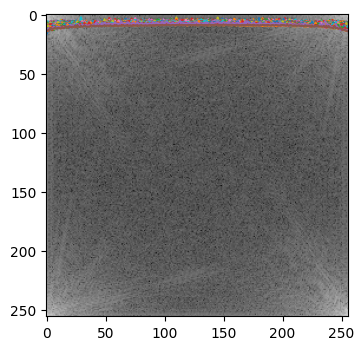

In [189]:
import PySimpleGUI as sg

def blank_frame():
    return sg.Frame("", [[]], pad=(5, 3), expand_x=True, expand_y=True, background_color='#404040', border_width=0)

sg.theme('DarkGrey4')

# layout_frame1 = [
#     # [blank_frame(), blank_frame()],
#     [
#     # sg.Frame([
    
# [  sg.Text("Original Image", size=(15, 1)),
#                 sg.Image(key='im1',size=(30,30))
#                 ],
#                 [ sg.Text("Median Filtered Image", size=(15, 1)),
#                 sg.Image(key='im2',size=(30,30))
                    
#                 ],
#                   [ sg.Text("Average Filtered Image", size=(15, 1)),
#                 sg.Image(key='im3',size=(30,30))
                    
#                 ],
        
        
#           sg.Frame(
#             layout=[
#                 [
#                     sg.Button(key='st',button_text="salt and pepper noise Filter", size=(20, 1)),
                   
#                 ],
#                  [
#                     sg.Button(key='gf',button_text="Gaussian Noise Filter", size=(20, 1)),
                   
#                 ],
#                   [
#                     sg.Button(key='uni',button_text="Uniform Noise Filter", size=(20, 1)),
                   
#                 ],
                
#             ],
#             title="Noise filters",
#             relief=sg.RELIEF_GROOVE,
#         ),
    
    
#         sg.Frame(
#             layout=[
#                 [
#                     sg.Button(key='sandp',button_text="Remove Impulse Noise", size=(20, 1)),
                   
#                 ],
#                  [
#                     sg.Button(key='geo',button_text="Geometric Mean Filter", size=(20, 1)),
                   
#                 ],
                
               
#             ],
#             title="Extra filters",
#             relief=sg.RELIEF_GROOVE,
#         ),
#     ],
#     [
#           sg.Frame(
#             layout=[
#                 [
#                     sg.Button(key='interp',button_text="Nearest Neighbour Interpolation", size=(20, 1)),
                   
#                 ],
#                  [
#                     sg.Button(key='interp2',button_text="Bilinear Interpolation", size=(20, 1)),                   
#                 ],
               
#             ],
#             title="Interpolation",
#             relief=sg.RELIEF_GROOVE,
#         ),
#          sg.Frame(
#             layout=[
#                 [
#                     sg.Button(key='forir',button_text="Fourir Transform", size=(20, 1)),
                   
#                 ],
#                  [
#                     sg.Button(key='forir2',button_text="Inverse Fourir Transform", size=(20, 1)),                   
#                 ],
               
#             ],
#             title="Fourir transform",
#             relief=sg.RELIEF_GROOVE,
#         ),
    
#         sg.Frame(
#             layout=[
#                 [
#                     sg.Text('K', size =(1, 1)), sg.InputText(size=(5,1),key="uu"),
#                     sg.Submit(key='high',button_text="Unsharp High Boost Filter", size=(20, 1)),
                   
#                 ],
#                 [
#                     sg.Text('C', size =(1, 1)), sg.InputText(size=(5,1),key="cc"),
#                     sg.Submit(key='lap',button_text="Laplacian Filter", size=(20, 1)),
                   
#                 ],
#                 [
#                     sg.Button(key='sobel',button_text="Sobel Filter", size=(20, 1)),
#                 ],
#                  [
#                     sg.Button(key='rob',button_text="Robert cross gradient", size=(20, 1)),
                   
#                 ],
               
#             ],
#             title="Sharpening filters",
#             relief=sg.RELIEF_GROOVE,
#         ),
#     ],
#     [
#          sg.Frame(

#             layout=[

#                 # [
#                 #     # column = [  ],
#                 #     sg.Column([layout=], scrollable=True,  vertical_scroll_only=True)
                    
#                 # ],
#                 [
#                     sg.Button(key='hist',button_text="Histogram Equalization", size=(20, 1)),
                   
#                 ],
#                 [
#                     sg.Text('Select the refrenced image', size =(20, 1)), sg.InputText(size=(15,1),key="spec",enable_events=True),
#                     sg.FolderBrowse(),
#                     sg.Submit(key='hmm',button_text="Histogram Matching", size=(25, 1)),
                   
#                 ],
               
#             ],
#             title="Histogram Filters",
#             relief=sg.RELIEF_GROOVE,
#         ),
  
#         sg.Frame(
#             layout=[
                
#                 [
                    
#                     sg.Button(key="median",size=((20,1)),button_text='Median Filter'),
#                 ],
#                 [
#                     sg.Button(key='aver',button_text="Average Filter", size=(20, 1)),
               
#                 ],
#                 [
#                     sg.Button(key='gau',button_text="Gaussian Filter", size=(20, 1)),
                   
#                 ],
#                 [
#                     sg.Button(key='adap',button_text="Adaptive median Filter", size=(20, 1)),
                   
#                 ],
                
                
               
#             ],
#             title="Smoothing Spatial filters",
#             relief=sg.RELIEF_GROOVE,
#         ),
#     ],
# ]









# layout_frame2 = [
#     [
#         sg.Text("Image Folder", size=(9, 1)),
#         sg.InputText(key='dest',default_text="Choose a folder...",enable_events=True, size=(30, 1)),
#         sg.FolderBrowse(),
#         sg.Checkbox("Make all changes on the same image",key='sdsd',enable_events=True),
    
        
#             sg.Frame(
#            layout = [
#              [sg.Text("Images", size=(15, 1)),],
#              [  sg.Text("Original Image", size=(15, 1)),
#                 sg.Image(key='im1',size=(30,30))
#                 ],
#                 [ sg.Text("Median Filtered Image", size=(15, 1)),
#                 sg.Image(key='im2',size=(30,30))
                    
#                 ],
#                   [ sg.Text("Average Filtered Image", size=(15, 1)),
#                 sg.Image(key='im3',size=(30,30))
                    
#                 ],
#                   [ sg.Text("Gaussian Filter Image", size=(15, 1)),
#                 sg.Image(key='im4',size=(30,30))
                    
#                 ],
#                  [ sg.Text("Adaptive Median Filter Image", size=(15, 1)),
#                 sg.Image(key='im5',size=(30,30))
                    
#                 ],
#                 [ sg.Text("Salt and Pepper Noise", size=(15, 1)),
#                 sg.Image(key='im6',size=(30,30))
                    
#                 ],
#                 [ sg.Text("Uniform Noise", size=(15, 1)),
#                 sg.Image(key='im17',size=(30,30))
                    
#                 ],

#             [ sg.Text("Fourir transform", size=(15, 1)),
#                 sg.Image(key='im30',size=(30,30))
                    
#                 ],
#                  [ sg.Text("Inverse Fourir transform", size=(15, 1)),
#                 sg.Image(key='im31',size=(30,30))
                    
#                 ],
              
          
#         ],
#           title="Images",
#             relief=sg.RELIEF_GROOVE,
#             #   scrollable = True,
#             #       vertical_scroll_only = True,
#             #           sbar_frame_color = None,
#                       #    size = (400, 600),
                
#         ),
#         ],
    
#     ]
#         #         layout=[

#         #         [
#         #             # column = [  ],
#         #             sg.Column([[sg.Text(f'Scrollable{i}')] for i in range(10)], scrollable=True,  vertical_scroll_only=True)
                    
#         #         ]
#         # ]
#         # )],]

# layout = [
#     [sg.Frame("Frame 1", layout_frame1, size=(800, 1000)),
#      sg.Frame("Frame 2", layout_frame2, size=(710, 1100), title_location=sg.TITLE_LOCATION_TOP)],]

# window = sg.Window("Title", layout, margins=(2, 2), finalize=True)
# window.maximize()
# while True:

#     event, values = window.read()
#     if event == sg.WINDOW_CLOSED:
#         break

# window.close()















#                 # [
#                 #     # column = [  ],
#                 #     sg.Column([[sg.Text(f'Scrollable{i}')] for i in range(10)], scrollable=True,  vertical_scroll_only=True)
                    
# #                 # ],
# sg.theme("Dark Grey")
# sg.frame(
#             title="Images",
#             relief=sg.RELIEF_GROOVE,
layout = [ 
    
    
    
    [
        sg.Text("Image Folder", size=(9, 1)),
        sg.InputText(key='dest',default_text="Choose a folder...",enable_events=True, size=(59, 1)),
        sg.FolderBrowse(),
        sg.Checkbox("Make all changes on the same image",key='sdsd',enable_events=True),
        sg.Frame(
           layout = [
             [sg.Text("Images", size=(15, 1)),],
             [  sg.Text("Original Image", size=(15, 1)),
                sg.Image(key='im1',size=(30,30))
                ],
                [ sg.Text("Edited Image", size=(15, 1)),
                sg.Image(key='im2',size=(30,30))
                    
                ],
                   [
                    
                    sg.Button(key="save",size=((20,1)),button_text='Save Image'),
                ],
                    
                              [ sg.Text("", size=(15, 1)),
                sg.Image(key='im3',size=(30,30))
                    
                ],
                  [ sg.Text("", size=(15, 1)),
                sg.Image(key='im4',size=(30,30))
                    
                ],
            #      [ sg.Text("Adaptive Median Filter Image", size=(15, 1)),
            #     sg.Image(key='im5',size=(30,30))
                    
            #     ],
            #     [ sg.Text("Salt and Pepper Noise", size=(15, 1)),
            #     sg.Image(key='im6',size=(30,30))
                    
            #     ],
            #     [ sg.Text("Uniform Noise", size=(15, 1)),
            #     sg.Image(key='im17',size=(30,30))
                    
            #     ],

            # [ sg.Text("Fourir transform", size=(15, 1)),
            #     sg.Image(key='im30',size=(30,30))
                    
            #     ],
            #      [ sg.Text("Inverse Fourir transform", size=(15, 1)),
            #     sg.Image(key='im31',size=(30,30))
                    
            #     ],
              
          
        ],
          title="Images",
            relief=sg.RELIEF_GROOVE,
            #   scrollable = True,
            #       vertical_scroll_only = True,
            #           sbar_frame_color = None,
                      #    size = (400, 600),
                
        ),
    
    #       sg.Frame(
    #        layout = [
             
    #             [ sg.Text("Histogram Equalized/Matched", size=(15, 1)),
    #             sg.Image(key='im9',size=(30,30))
                    
    #             ],
    #              [ sg.Text("Histogram Specified Image", size=(15, 1)),
    #             sg.Image(key='im15',size=(30,30))
                    
    #             ],
    #             [ sg.Text("Gaussian Noise Filter", size=(15, 1)),
    #             sg.Image(key='im7',size=(30,30))
                    
    #             ],
    #              [ sg.Text("Salt and pepper Noise Filter", size=(15, 1)),
    #             sg.Image(key='im8',size=(30,30))
                    
    #             ],

    #              [ sg.Text("Unsharped High Boost Sharpened Image", size=(15, 1)),
    #             sg.Image(key='im10',size=(30,30))
                    
    #             ],
    #             [ sg.Text("Laplacian Sharpened Image", size=(15, 1)),
    #             sg.Image(key='im11',size=(30,30))
                    
    #             ],
    #             [ sg.Text("Sobel Image", size=(15, 1)),
    #             sg.Image(key='im12',size=(30,30))
                    
    #             ],
    #              [ sg.Text("Robert cross gradient", size=(15, 1)),
    #             sg.Image(key='im13',size=(30,30))
                    
    #             ],
    #              [ sg.Text("Nearest neighbour interpolation", size=(15, 1)),
    #             sg.Image(key='im14',size=(30,30))
                    
    #             ],
    #              [ sg.Text("Bilinear interpolation", size=(15, 1)),
    #             sg.Image(key='im16',size=(30,30))
                    
    #             ],
    #             [ sg.Text("Remove Impulse Noise", size=(15, 1)),
    #             sg.Image(key='im20',size=(30,30))
                    
    #             ],
    #             [ sg.Text("Geometric Mean", size=(15, 1)),
    #             sg.Image(key='im18',size=(30,30))
                    
    #             ],
              
          
    #     ],
    #       title="Images",
    #         relief=sg.RELIEF_GROOVE,
    #         #   scrollable = True,
    #         #       vertical_scroll_only = True,
    #         #           sbar_frame_color = None,
    #                   #    size = (400, 600),
                
    #     ),
        
    
    ],
    [
    # sg.Frame([
    

        
        
          sg.Frame(
            layout=[
                [
                    sg.Button(key='st',button_text="salt and pepper noise Filter", size=(20, 1)),
                   
                ],
                 [
                    sg.Button(key='gf',button_text="Gaussian Noise Filter", size=(20, 1)),
                   
                ],
                  [
                    sg.Button(key='uni',button_text="Uniform Noise Filter", size=(20, 1)),
                   
                ],
                
            ],
            title="Noise filters",
            relief=sg.RELIEF_GROOVE,
        ),
    
    
        sg.Frame(
            layout=[
                [
                    sg.Button(key='sandp',button_text="Remove Impulse Noise", size=(20, 1)),
                   
                ],
                 [
                    sg.Button(key='geo',button_text="Geometric Mean Filter", size=(20, 1)),
                   
                ],
                
               
            ],
            title="Extra filters",
            relief=sg.RELIEF_GROOVE,
        ),
    ],
    [
          sg.Frame(
            layout=[
                [
                    sg.Button(key='interp',button_text="Nearest Neighbour Interpolation", size=(20, 1)),
                   
                ],
                 [
                    sg.Button(key='interp2',button_text="Bilinear Interpolation", size=(20, 1)),                   
                ],
               
            ],
            title="Interpolation",
            relief=sg.RELIEF_GROOVE,
        ),
         sg.Frame(
            layout=[
                [
                    sg.Button(key='forir',button_text="Fourir Transform", size=(20, 1)),
                   
                ],
                 [
                    sg.Button(key='forir2',button_text="Inverse Fourir Transform", size=(20, 1)),                   
                ],
               
            ],
            title="Fourir transform",
            relief=sg.RELIEF_GROOVE,
        ),
    
        sg.Frame(
            layout=[
                [
                    sg.Text('K', size =(1, 1)), sg.InputText(size=(5,1),key="uu"),
                    sg.Submit(key='high',button_text="Unsharp High Boost Filter", size=(20, 1)),
                   
                ],
                [
                    sg.Text('C', size =(1, 1)), sg.InputText(size=(5,1),key="cc"),
                    sg.Submit(key='lap',button_text="Laplacian Filter", size=(20, 1)),
                   
                ],
                [
                    sg.Button(key='sobel',button_text="Sobel Filter", size=(20, 1)),
                ],
                 [
                    sg.Button(key='rob',button_text="Robert cross gradient", size=(20, 1)),
                   
                ],
               
            ],
            title="Sharpening filters",
            relief=sg.RELIEF_GROOVE,
        ),
    ],
    [
         sg.Frame(

            layout=[

                # [
                #     # column = [  ],
                #     sg.Column([layout=], scrollable=True,  vertical_scroll_only=True)
                    
                # ],
                [
                    sg.Button(key='hist',button_text="Histogram Equalization", size=(20, 1)),
                   
                ],
                [
                    
                    sg.Text('Select the refrenced image', size =(20, 1)), sg.InputText(size=(15,1),key="spec",enable_events=True),
                    sg.FolderBrowse(),
                    sg.Submit(key='hmm',button_text="Histogram Matching", size=(25, 1)),
                   
                ],
               
            ],
            title="Histogram Filters",
            relief=sg.RELIEF_GROOVE,
            #  sg.pin(sg.Column(layout, key='hist'))
        ),
       
  
        sg.Frame(
            layout=[
                    [
                    # sg.Text('Select desired filter size', size =(20, 1)), sg.InputText(size=(5,1),key="cc"),
                    sg.Submit(key='median',button_text="median Filter", size=(20, 1)),
                   
                ],
                # [
                    
                #     sg.Button(key="median",size=((20,1)),button_text='Median Filter'),
                # ],
                [
                    sg.Button(key='aver',button_text="Average Filter", size=(20, 1)),
               
                ],
                [
                    sg.Button(key='gau',button_text="Gaussian Filter", size=(20, 1)),
                   
                ],
             
                [
                    sg.Button(key='adap',button_text="Adaptive median Filter", size=(20, 1)),
                   
                ],
                
                
               
            ],
            title="Smoothing Spatial filters",
            relief=sg.RELIEF_GROOVE,
        ),
    ],
        #         layout=[

        #         [
        #             # column = [  ],
        #             sg.Column([[sg.Text(f'Scrollable{i}')] for i in range(10)], scrollable=True,  vertical_scroll_only=True)
                    
        #         ]
        # ]
        # )],
    ]

        #     layout=[

        #         [
        #             # column = [  ],
        #             sg.Column([[sg.Text(f'Scrollable{i}')] for i in range(10)], scrollable=True,  vertical_scroll_only=True)
                    
        #         ]
        # ]
#    ),
   

window = sg.Window("Image Enhancement Project", layout).Finalize()
window.Maximize()

f=0
while True:
    event, values = window.read()
    if event == "Exit" or event == sg.WIN_CLOSED:
            break
    if event=='sdsd':
        if values['sdsd']==True:
            #print(values['sdsd'])
            f=1
        else:
            f=0
    if event=='dest':
        # #print(values['dest'])
        im = parse_folder(values['dest'])
        img=cv2.imread(im,0)
        # #print(im)
        load_image(im,window)
        # image= pad(img)
    if event=='aa':
        k=int(values['cc'])
        print(k)
    if event=='median':
        if f==1:
            k=int(values['uu'])
            print(k)
            image = pad(img)
            img = medianfilter(image,k,window)
        else:
            k=int(values['uu'])
            print(k)

            image = pad(img)
            x = medianfilter(image,k,window)
    if event =='aver':
        if f==1:
            image = pad(img)
            img =avregingfilter(image,window)
        else:
            image = pad(img)
            x =avregingfilter(image,window)
    if event =='gau':
        if f==1:
            image = pad(img)
            img = gausian(image,window)
        else:
            image = pad(img)
            x = gausian(image,window)
    if event=='geo':
        if f==1:
            image = pad(img)
            img = geomean(image,window)
        else:
            image = pad(img)
            x = geomean(image,window)
    if event =='adap':
        if f==1:
            image = pad(img)
            img = adaptivemdeianfilter(image,window)
        else:
            image = pad(img)
            x = adaptivemdeianfilter(image,window)
    if event=='sandp':
        if f==1:
            img = removesalt(img,3,window)
        else:
            x = removesalt(img,3,window)
    if event =='gf':
        if f==1:
            img = addgaussiannoise(img,window)
        else:
            x = addgaussiannoise(img,window)
    if event =='st':
        if f==1:
            img = saltandpepper(img,window)
        else:
            x = saltandpepper(img,window)
    if event=='hist':
        if f==1:
            img = histeq(img,window)
            # histbefore(img)
        else:
            x = histeq(img,window)
            histbefore(img)
    if event =='high':
        k=int(values['uu'])
        if f==1:
            img = unsharphighboost(k,img,window)
        else:
            x = unsharphighboost(k,img,window)
    if event=='lap' or event=='aa':
        k=int(values['cc'])
        print(k)
        if f==1:
            img = laplacian(img,k,window)
        else:
            x = laplacian(img,k,window)
    if event=='sobel':
        if f==1:
            img = sobel(img,window)
        else:
            x= sobel(img,window)
    if event=='rob':
        if f==1:
            img = robert(img,window)
        else:
            x =  robert(img,window)
    if event=='interp':
        if f==1:
            img = intneighbor(img,window)
        else:
            x  =intneighbor(img,window)
    if event=='interp2':
        if f==1:
            img = interb(img,window)
        else:
            x=interb(img,window)
    if event=='spec':
        im2 = parse_folder(values['spec'])
        #print(im2)
    if event=='hmm':
        if f==1:
            img = histm(img,im2,window)
        else:
            x = histm(img,im2,window)
    if event=='uni':
        if f==1:
            img=adduniformnoise(img,window)
        else:
            x = adduniformnoise(img,window)
    if event =='forir':
        ff  = DFT(img, window)
    if event =='forir2':
        inversef(img,window)
    if event=='save':
        cv2.imwrite('enhancedimage.png',img)
window.close()


In [190]:


    # sg.Frame(
    #        layout = [
             
    #             [ sg.Text("Histogram Equalized/Matched", size=(15, 1)),
    #             sg.Image(key='im9',size=(30,30))
                    
    #             ],
    #              [ sg.Text("Histogram Specified Image", size=(15, 1)),
    #             sg.Image(key='im15',size=(30,30))
                    
    #             ],
    #             [ sg.Text("Gaussian Noise Filter", size=(15, 1)),
    #             sg.Image(key='im7',size=(30,30))
                    
    #             ],
    #              [ sg.Text("Salt and pepper Noise Filter", size=(15, 1)),
    #             sg.Image(key='im8',size=(30,30))
                    
    #             ],

    #              [ sg.Text("Unsharped High Boost Sharpened Image", size=(15, 1)),
    #             sg.Image(key='im10',size=(30,30))
                    
    #             ],
    #             [ sg.Text("Laplacian Sharpened Image", size=(15, 1)),
    #             sg.Image(key='im11',size=(30,30))
                    
    #             ],
    #             [ sg.Text("Sobel Image", size=(15, 1)),
    #             sg.Image(key='im12',size=(30,30))
                    
    #             ],
    #              [ sg.Text("Robert cross gradient", size=(15, 1)),
    #             sg.Image(key='im13',size=(30,30))
                    
    #             ],
    #              [ sg.Text("Nearest neighbour interpolation", size=(15, 1)),
    #             sg.Image(key='im14',size=(30,30))
                    
    #             ],
    #              [ sg.Text("Bilinear interpolation", size=(15, 1)),
    #             sg.Image(key='im16',size=(30,30))
                    
    #             ],
    #             [ sg.Text("Remove Impulse Noise", size=(15, 1)),
    #             sg.Image(key='im20',size=(30,30))
                    
    #             ],
    #             [ sg.Text("Geometric Mean", size=(15, 1)),
    #             sg.Image(key='im18',size=(30,30))
                    
    #             ],
              
          
    #     ],
    #       title="Images",
    #         relief=sg.RELIEF_GROOVE,
    #         #   scrollable = True,
    #         #       vertical_scroll_only = True,
    #         #           sbar_frame_color = None,
    #                   #    size = (400, 600),
                
    #     ),],